#**Import Data**

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Loading Data
df= pd.read_csv('datalama.csv', delimiter=';', header=0)
df

,Day,Titik,ADCpHTanah,pHTanah,ADCKelembabanTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label,pHTanah.1
0,1,1,219,4.74,527,48,37,67,Tidak,"4,74"
1,1,1,219,4.74,528,48,37,67,Tidak,"4,74"
2,1,1,221,4.71,531,48,38,65,Tidak,"4,71"
3,1,1,221,4.71,532,48,38,65,Tidak,"4,71"
4,1,1,223,4.69,533,48,38,65,Tidak,"4,69"
...,...,...,...,...,...,...,...,...,...,...
6335,7,6,251,4.30,866,65,27,46,Ya,"4,30"
6336,7,6,250,4.31,866,65,27,46,Ya,"4,31"
6337,7,6,250,4.31,867,65,27,46,Ya,"4,31"
6338,7,6,249,4.32,866,65,27,46,Ya,"4,32"


In [ ]:
#Drop Columns
df.drop(df.columns[[0, 1, 2, 4, 9]], axis=1, inplace=True)
#df.to_csv('DataBersih.csv')
df

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,4.74,48,37,67,Tidak
1,4.74,48,37,67,Tidak
2,4.71,48,38,65,Tidak
3,4.71,48,38,65,Tidak
4,4.69,48,38,65,Tidak
...,...,...,...,...,...
6335,4.30,65,27,46,Ya
6336,4.31,65,27,46,Ya
6337,4.31,65,27,46,Ya
6338,4.32,65,27,46,Ya


In [ ]:
#Check Dataframe's Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pHTanah          6340 non-null   float64
 1   KelembabanTanah  6340 non-null   int64  
 2   SuhuUdara        6340 non-null   int64  
 3   KelembabanUdara  6340 non-null   int64  
 4   Label            6340 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 247.8+ KB


In [ ]:
#Check Missing Data
df.isna().sum()

,0
pHTanah,0
KelembabanTanah,0
SuhuUdara,0
KelembabanUdara,0
Label,0


In [ ]:
#Check Dataframe's Dimension
df.shape

(6340, 5)

In [ ]:
#Checking Value of Each Class
class_counts = df['Label'].value_counts()  # Gantilah 'kelas_target' dengan nama kolom target Anda
print(class_counts)

Label
Ya       4008
Tidak    2332
Name: count, dtype: int64


In [ ]:
#To Describe Dataframe
df.describe()

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
count,6340.000000,6340.000000,6340.000000,6340.000000
mean,4.825002,45.659306,35.672555,50.126972
std,0.810032,22.588593,3.958497,8.595049
min,2.180000,0.000000,27.000000,33.000000
25%,4.320000,20.000000,33.000000,45.000000
50%,4.520000,52.000000,36.000000,47.000000
75%,5.070000,66.000000,37.000000,55.250000
max,7.770000,70.000000,49.000000,67.000000


#**Pie Chart**

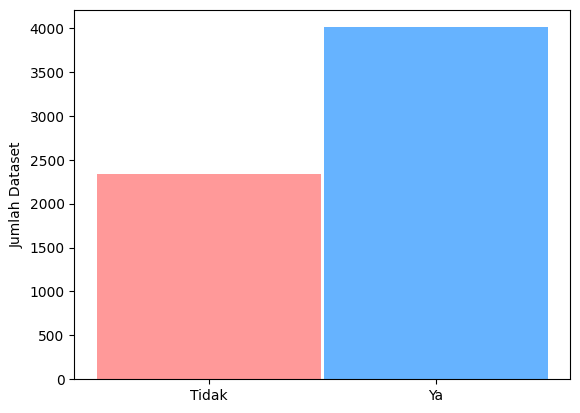

In [ ]:
import matplotlib.pyplot as plt

# Data yang akan diplot
labels = ['Tidak', 'Ya']
sizes = [2332, 4008]
colors = ['#ff9999', '#66b3ff']

# Membuat bar chart tanpa spasi antar bar
fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors, width=0.99)  # Mengurangi width untuk mengurangi spasi

# Menambahkan judul dan label pada sumbu
ax.set_ylabel('Jumlah Dataset')

# Menampilkan plot
plt.show()

# Simpan gambar (opsional)
# plt.savefig('kelayakan_bar_chart.png', bbox_inches='tight')

([<matplotlib.patches.Wedge at 0x790c07aadb40>,
 [Text(0.4437557830151545, 1.0065191528434059, 'Tidak'),
  Text(-0.4437558772522766, -1.0065191112959866, 'Ya')],
 [Text(0.24204860891735697, 0.5490104470054941, '36.8%'),
  Text(-0.24204866031942357, -0.5490104243432653, '63.2%')])

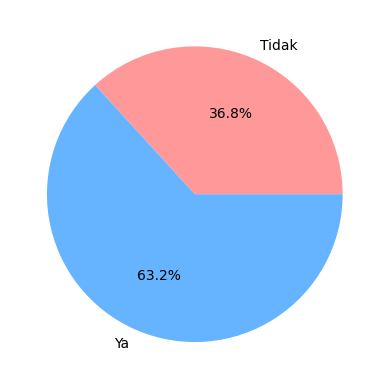

In [ ]:
#Pie Chart of Label
labels = 'Tidak', 'Ya'
sizes = [2332, 4008]
colors = ['#ff9999', '#66b3ff']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
# plt.savefig('kelayakan_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

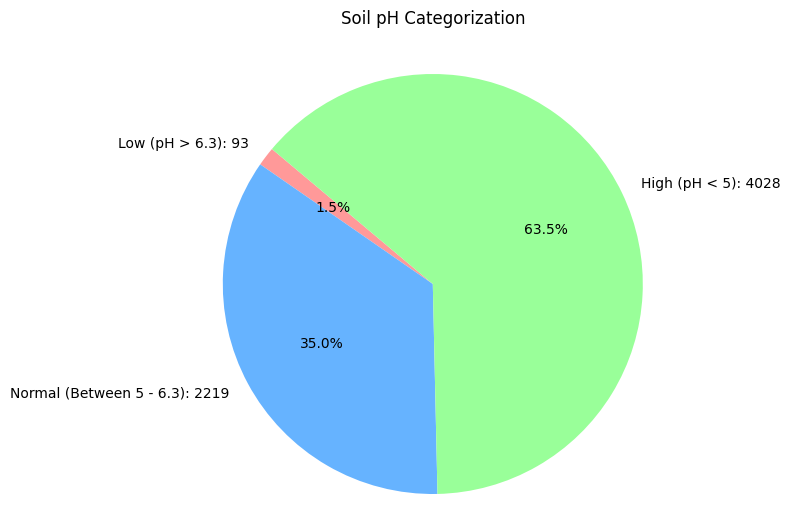

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset of pH values
data = df['pHTanah']
df1 = pd.DataFrame(data)
ph_data = df1['pHTanah']

# Classify pH values based on rules
low = normal = high = 0
for ph in ph_data:
    if ph > 6.3:
        low += 1
    elif 5 <= ph <= 6.3:
        normal += 1
    else:
        high += 1

# Labels and sizes for the pie chart
labels = [f'Low (pH > 6.3): {low}', f'Normal (Between 5 - 6.3): {normal}', f'High (pH < 5): {high}']
sizes = [low, normal, high]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Colors for each category

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Soil pH Categorization\n')

# Save the pie chart as an image file (e.g., PNG, JPG, PDF, etc.)
# plt.savefig('soil_pH_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

plt.show()


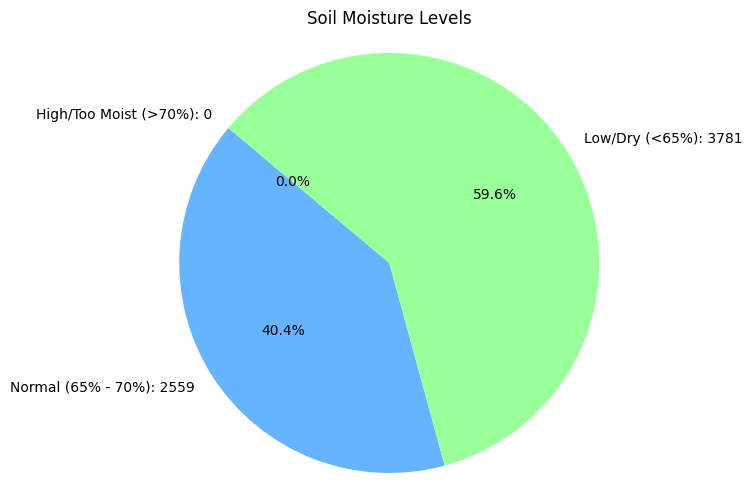

In [ ]:
#Pie Chart of Soil Moisture
data=df['KelembabanTanah']
df2 = pd.DataFrame(data)

# Sample dataset of pH values
soil_data = df2['KelembabanTanah']
# Classify pH values based on rules
high_moisture = normal_moisture = low_moisture = 0
for moist in soil_data:
    if moist > 70:
        high_moisture += 1
    elif 65 <= moist <= 70:
        normal_moisture += 1
    else:
        low_moisture += 1

# Labels and sizes for the pie chart
labels = [f'High/Too Moist (>70%): {high_moisture}', f'Normal (65% - 70%): {normal_moisture}', f'Low/Dry (<65%): {low_moisture}']
sizes = [high_moisture, normal_moisture, low_moisture]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Colors for each category

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Soil Moisture Levels')
# Save the pie chart as an image file (e.g., PNG, JPG, PDF, etc.)
# plt.savefig('soil_moisture_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

plt.show()


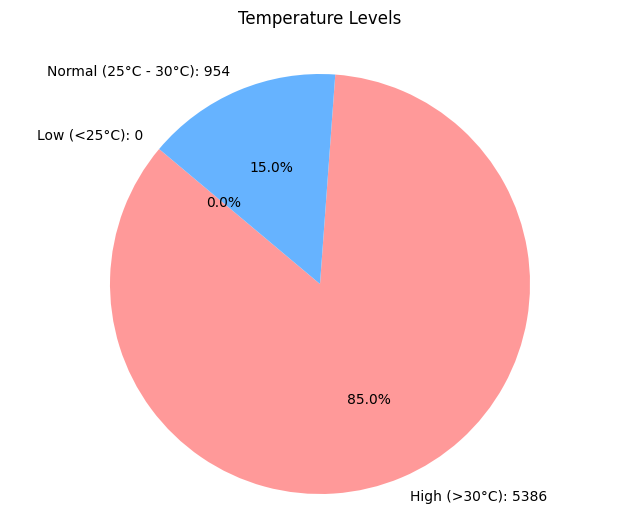

In [ ]:
#Pie Chart of Temperature
data=df['SuhuUdara']
df3 = pd.DataFrame(data)

# Sample dataset of pH values
soil_data = df3['SuhuUdara']
high_temp = normal_temp = low_temp = 0

for temp in df3['SuhuUdara']:
    if temp > 30:
        high_temp += 1
    elif 25 <= temp <= 30:
        normal_temp += 1
    else:
        low_temp += 1

# Labels and sizes for the pie chart
labels = [f'High (>30°C): {high_temp}', f'Normal (25°C - 30°C): {normal_temp}', f'Low (<25°C): {low_temp}']
sizes = [high_temp, normal_temp, low_temp]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Colors for each category

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Temperature Levels\n')
# Save the pie chart as an image file (e.g., PNG, JPG, PDF, etc.)
# plt.savefig('temperature_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

# Display the pie chart
plt.show()


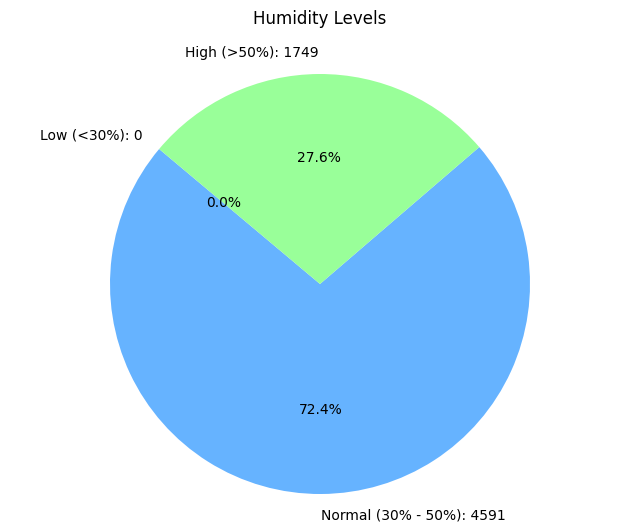

In [ ]:
#Pie Chart of Humidity
data=df['KelembabanUdara']
df4 = pd.DataFrame(data)

# Sample dataset of pH values
soil_data = df4['KelembabanUdara']
low_humidity = normal_humidity = high_humidity = 0

for humidity in df4['KelembabanUdara']:
    if humidity < 30:
        low_humidity += 1
    elif 30 <= humidity <= 50:
        normal_humidity += 1
    else:
        high_humidity += 1

# Labels and sizes for the pie chart
labels = [f'Low (<30%): {low_humidity}', f'Normal (30% - 50%): {normal_humidity}', f'High (>50%): {high_humidity}']
sizes = [low_humidity, normal_humidity, high_humidity]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Colors for each category

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Humidity Levels\n')
# Save the pie chart as an image file (e.g., PNG, JPG, PDF, etc.)
# plt.savefig('humidity_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

# Display the pie chart
plt.show()

#**Split Data**

In [ ]:
#Separating X dataframe
x=df.iloc[:,0:-1]
x

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
0,4.74,48,37,67
1,4.74,48,37,67
2,4.71,48,38,65
3,4.71,48,38,65
4,4.69,48,38,65
...,...,...,...,...
6335,4.30,65,27,46
6336,4.31,65,27,46
6337,4.31,65,27,46
6338,4.32,65,27,46


In [ ]:
#Transforming Label into 0 1 (numerical) format
df['Label'] = df['Label'].map({'Tidak': 0, 'Ya': 1})
df['Label'] = pd.to_numeric(df['Label'], errors='coerce')

In [ ]:
#Checking Label's current datatype
cols = ['Label']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

Label has [0 1] values



In [ ]:
#Separating Y dataframe
y=df.iloc[:,[-1]]
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
6335,1
6336,1
6337,1
6338,1


In [ ]:
#Split Dataset
from sklearn.model_selection import train_test_split
x_main, x_test, y_main, y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
print(f"Main data shape: {x_main.shape}")
print(f"Testing data shape: {x_test.shape}")

Main data shape: (5072, 4)
Testing data shape: (1268, 4)


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=0.2, random_state=1)

In [ ]:
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")

Training data shape: (4057, 4)
Validation data shape: (1015, 4)


#**Checking Data**

##Cek data main, test, validation, training

In [ ]:
#Checking data train
x_main

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
5033,4.39,66,37,65
847,3.75,53,35,65
2263,6.13,7,36,47
2209,6.12,7,35,45
62,4.41,43,39,54
...,...,...,...,...
905,4.88,51,35,45
5192,4.37,66,37,65
3980,4.56,68,38,44
235,4.28,39,48,37


In [ ]:
#Checking data train
y_main

,Label
5033,0
847,0
2263,1
2209,1
62,0
...,...
905,0
5192,0
3980,1
235,0


In [ ]:
#Checking data test
x_test
# x_test.to_csv('x_test.csv')

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
607,4.05,55,41,50
1812,6.19,8,33,50
354,4.27,37,47,55
1620,6.42,9,33,47
1073,5.07,49,33,48
...,...,...,...,...
987,5.05,50,33,49
432,4.41,61,47,51
588,4.06,56,41,48
2708,4.63,17,36,60


In [ ]:
#Checking data test
y_test
# y_test.to_csv('y_test.csv')

,Label
607,0
1812,1
354,0
1620,0
1073,1
...,...
987,1
432,0
588,0
2708,0


In [ ]:
x_val

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
1970,6.12,8,33,50
4679,5.06,67,37,65
2166,6.09,7,35,47
209,4.41,40,47,38
3421,6.16,39,38,48
...,...,...,...,...
1702,6.17,9,33,48
1138,5.02,48,33,46
3206,5.02,36,37,46
5007,4.39,66,37,65


In [ ]:
y_val

,Label
1970,1
4679,1
2166,1
209,0
3421,1
...,...
1702,1
1138,1
3206,1
5007,0


In [ ]:
x_train

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
3802,4.55,69,38,43
5978,4.19,16,30,39
365,4.25,37,47,58
5297,4.41,65,37,66
819,3.77,53,35,66
...,...,...,...,...
2259,6.14,7,36,47
142,4.45,41,43,48
2331,6.10,7,36,41
4959,6.09,66,37,65


In [ ]:
y_train

,Label
3802,1
5978,1
365,0
5297,0
819,0
...,...
2259,1
142,0
2331,1
4959,1


##Data percentage

In [ ]:
#Checking Label's value on data test
class_counts = y_main['Label'].value_counts()  # Gantilah 'kelas_target' dengan nama kolom target Anda
print(class_counts)

Label
1    3211
0    1861
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x790c07a6f130>,
 [Text(0.4466217079276758, 1.0052507398692954, 'Tidak'),
  Text(-0.44662170792767575, -1.0052507398692956, 'Ya')],
 [Text(0.24361184068782313, 0.548318585383252, '36.7%'),
  Text(-0.2436118406878231, -0.5483185853832521, '63.3%')])

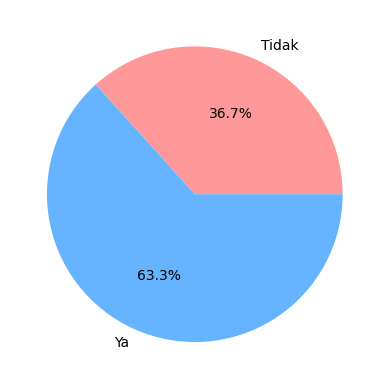

In [ ]:
#Pie Chart of Label's Value
labels = 'Tidak', 'Ya'
sizes = [1861, 3211]
colors = ['#ff9999', '#66b3ff']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
# plt.savefig('kelayakan_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

In [ ]:
#Checking Label's value on data test
class_counts = y_test['Label'].value_counts()  # Gantilah 'kelas_target' dengan nama kolom target Anda
print(class_counts)

Label
1    797
0    471
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x790c07fb2d70>,
 [Text(0.43225591494113985, 1.0115111586128935, 'Tidak'),
  Text(-0.43225582023662884, -1.0115111990836085, 'Ya')],
 [Text(0.23577595360425807, 0.5517333592433964, '37.1%'),
  Text(-0.23577590194725206, -0.5517333813183318, '62.9%')])

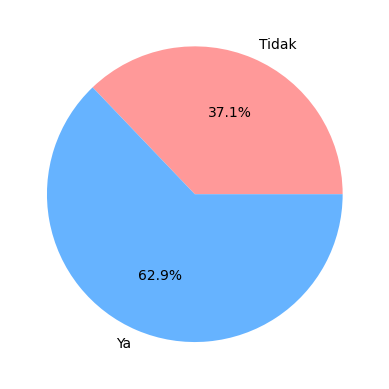

In [ ]:
#Pie Chart of Label's Value
labels = 'Tidak', 'Ya'
sizes = [471, 797]
colors = ['#ff9999', '#66b3ff']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
# plt.savefig('kelayakan_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

In [ ]:
#Checking Label's value on data train
class_counts = y_train['Label'].value_counts()  # Gantilah 'kelas_target' dengan nama kolom target Anda
print(class_counts)

Label
1    2582
0    1475
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x790c0811bf10>,
 [Text(0.4571678177261302, 1.0004986688824369, 'Tidak'),
  Text(-0.4571678177261303, -1.0004986688824369, 'Ya')],
 [Text(0.2493642642142528, 0.5457265466631472, '36.4%'),
  Text(-0.24936426421425287, -0.5457265466631472, '63.6%')])

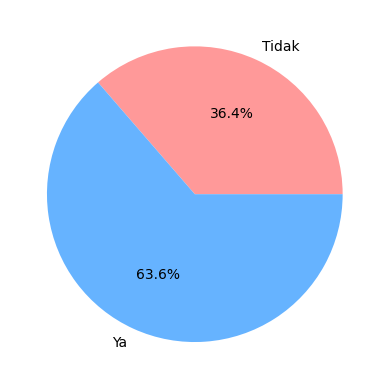

In [ ]:
#Pie Chart of Label's Value
labels = 'Tidak', 'Ya'
sizes = [1475, 2582]
colors = ['#ff9999', '#66b3ff']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
# plt.savefig('kelayakan_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

In [ ]:
#Checking Label's value on data train
class_counts = y_val['Label'].value_counts()  # Gantilah 'kelas_target' dengan nama kolom target Anda
print(class_counts)

Label
1    629
0    386
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x790c0803aec0>,
 [Text(0.4039871293895277, 1.023129707948904, 'Tidak'),
  Text(-0.4039871293895276, -1.023129707948904, 'Ya')],
 [Text(0.22035661603065143, 0.5580707497903111, '38.0%'),
  Text(-0.22035661603065138, -0.5580707497903111, '62.0%')])

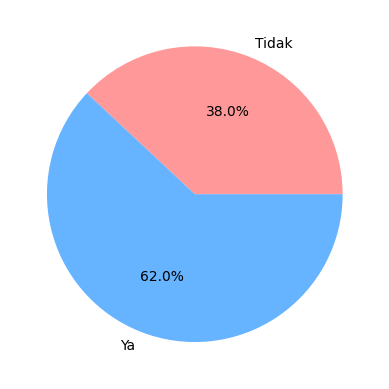

In [ ]:
#Pie Chart of Label's Value
labels = 'Tidak', 'Ya'
sizes = [386, 629]
colors = ['#ff9999', '#66b3ff']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
# plt.savefig('kelayakan_pie_chart.png', bbox_inches='tight')  # Specify the filename and format

#**Classify without Hyperparameter Tuning**

In [ ]:
#Calling library
classifier = GradientBoostingClassifier()
#Training model on the current data train
classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
import pickle

# Save the model to a file
with open('gb_default.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [ ]:
# Determine the number of trees used by staged_predict (Without hyperparameter tuning)
num_trees_used = 0
for stage_pred in classifier.staged_predict(x_train):
    num_trees_used += 1

print(f"Number of trees used in Gradient Boosting Classifier: {num_trees_used}")

Number of trees used in Gradient Boosting Classifier: 100


Training Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0


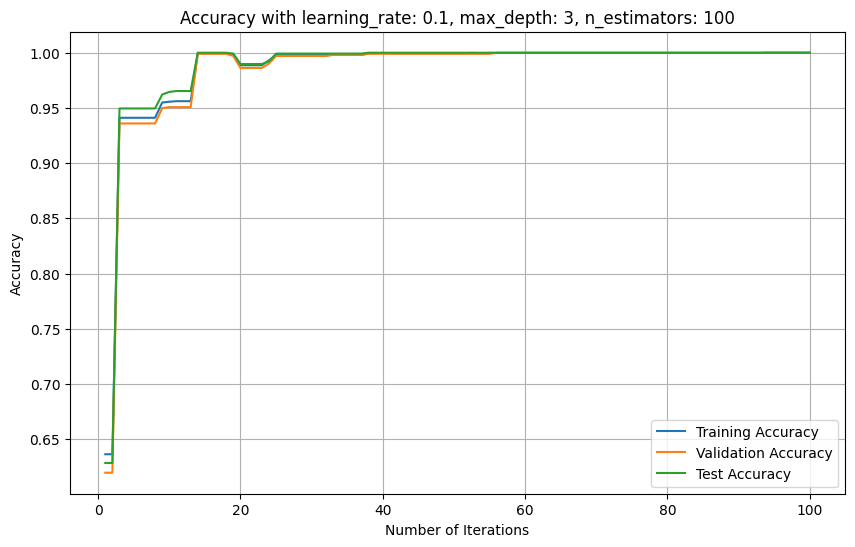

In [ ]:
import pickle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_val, y_val, x_test, y_test are already defined

# Load the pre-trained GradientBoostingClassifier model
with open('gb_default.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

train_accuracies = []
val_accuracies = []
test_accuracies = []

# Obtain staged predictions and collect accuracies
for train_pred, val_pred, test_pred in zip(
    loaded_model.staged_predict(x_train),
    loaded_model.staged_predict(x_val),
    loaded_model.staged_predict(x_test)
):
    # Training accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Validation accuracy
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)

    # Test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')
print(f"Test Accuracy: {test_accuracy}")
# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy with learning_rate: 0.1, max_depth: 3, n_estimators: 100')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Confusion Matrix :- \n{confusion_matrix(y_train, train_pred)}\n")

Confusion Matrix :- 
[[1475    0]
 [   0 2582]]



In [ ]:
#Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Confusion Matrix :- \n{confusion_matrix(y_val, val_pred)}\n")

Confusion Matrix :- 
[[386   0]
 [  0 629]]



In [ ]:
#Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, test_pred)}\n")

Confusion Matrix :- 
[[471   0]
 [  0 797]]



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, test_pred, average='binary')
recall = recall_score(y_test, test_pred, average='binary')
f1 = f1_score(y_test, test_pred, average='binary')

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Precision: 1.0, Recall: 1.0, F1 Score: 1.0


AUC: 1.0


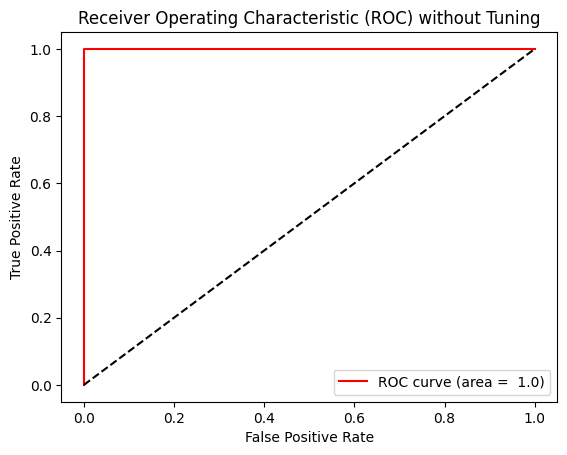

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score

fpr, tpr, thresholds = roc_curve(y_test, test_pred)
auc = auc(fpr, tpr)
print(f"AUC: {auc}")

plt.plot(fpr, tpr,color='red',label=f'ROC curve (area =  {auc})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal untuk klasifikasi acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) without Tuning')
plt.legend(loc='lower right')
plt.show()


#**Classify with Hyperparameter (Analysis)**

In [ ]:
from sklearn.metrics import log_loss
from itertools import product

##Learning Rate = 0.15

Iteration 1: learning_rate=0.15, max_depth=1, n_estimators=125
  Training Accuracy: 0.9891545476953414
  Validation Accuracy: 0.9881773399014778
  Test Accuracy: 0.9905362776025236
  Training Log Loss: 0.0522, Validation Log Loss: 0.0531, Test Log Loss: 0.0523

Iteration 2: learning_rate=0.15, max_depth=1, n_estimators=150
  Training Accuracy: 0.9990140497904856
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
  Training Log Loss: 0.0383, Validation Log Loss: 0.0380, Test Log Loss: 0.0381

Iteration 3: learning_rate=0.15, max_depth=1, n_estimators=175
  Training Accuracy: 0.9990140497904856
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
  Training Log Loss: 0.0291, Validation Log Loss: 0.0283, Test Log Loss: 0.0287

Iteration 4: learning_rate=0.15, max_depth=1, n_estimators=200
  Training Accuracy: 0.9992605373428641
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
  Training Log Loss: 0.0228, Validation Log Loss: 0.0218, Test Log Loss: 0.0223

Iteration 5: learning_rate=0.15, max_depth

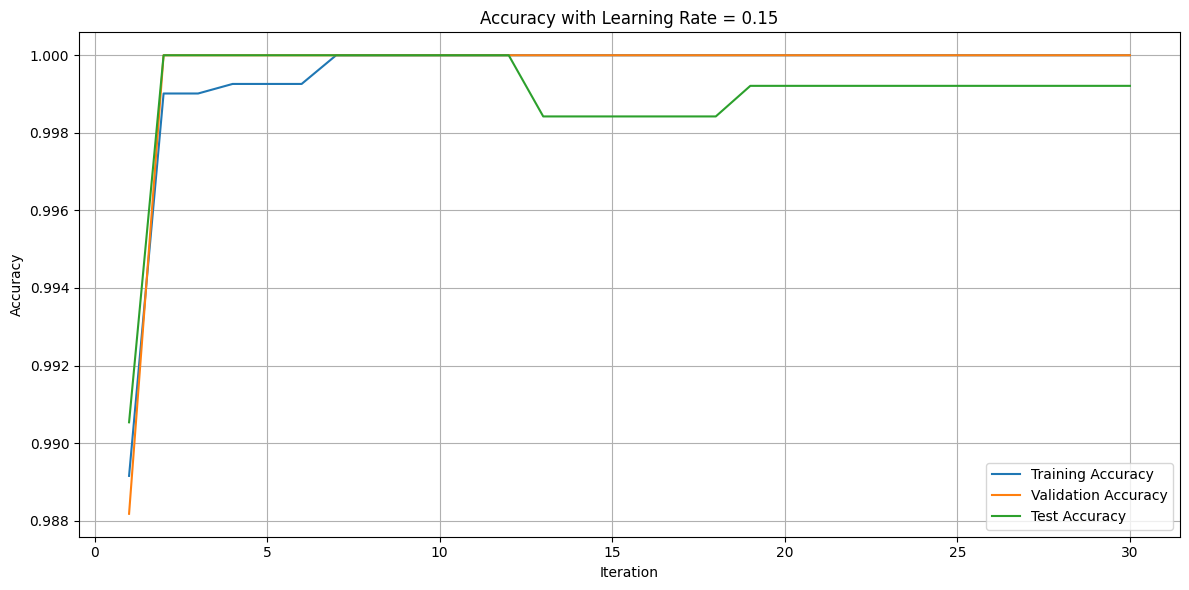

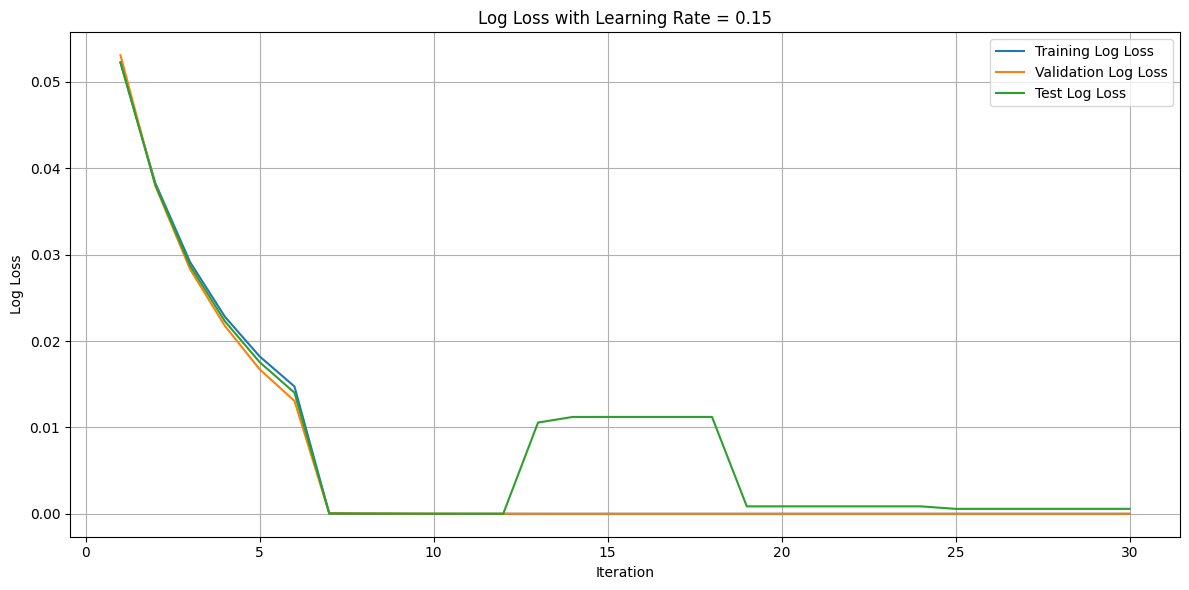

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from itertools import product

# Parameters for Grid Search
parameters = {
    "learning_rate": [0.15],
    "n_estimators": [125, 150, 175, 200, 225, 250],
    "max_depth": [1, 3, 5, 7, 9]
}

# Lists to store parameter combinations, iteration numbers, accuracies, and log losses
param_combinations = list(product(parameters["learning_rate"], parameters["max_depth"], parameters["n_estimators"]))
iterations = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

# Iterate over all parameter combinations
for iteration, (lr, max_depth, n_estimators) in enumerate(param_combinations, start=1):
    # Create classifier with current parameters
    gbc1 = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # Fit classifier to training data
    gbc1.fit(x_train, y_train)

    # Make predictions on training, validation, and test data
    y_train_pred = gbc1.predict(x_train)
    y_val_pred = gbc1.predict(x_val)
    y_test_pred = gbc1.predict(x_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log losses
    y_train_pred_proba = gbc1.predict_proba(x_train)
    y_val_pred_proba = gbc1.predict_proba(x_val)
    y_test_pred_proba = gbc1.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Append iteration number, accuracies, and log losses to lists
    iterations.append(iteration)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    print(f"Iteration {iteration}: learning_rate={lr}, max_depth={max_depth}, n_estimators={n_estimators}")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Validation Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print(f"  Training Log Loss: {train_loss:.4f}, Validation Log Loss: {val_loss:.4f}, Test Log Loss: {test_loss:.4f}")
    print()

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Learning Rate = 0.15')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the log losses
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_losses, label='Training Log Loss')
plt.plot(iterations, val_losses, label='Validation Log Loss')
plt.plot(iterations, test_losses, label='Test Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss with Learning Rate = 0.15')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Learning Rate = 0.1

Iteration 1: learning_rate=0.1, max_depth=1, n_estimators=125
  Training Accuracy: 0.9894010352477199
  Validation Accuracy: 0.9881773399014778
  Test Accuracy: 0.9905362776025236
  Training Log Loss: 0.0968, Validation Log Loss: 0.0988, Test Log Loss: 0.0970

Iteration 2: learning_rate=0.1, max_depth=1, n_estimators=150
  Training Accuracy: 0.9894010352477199
  Validation Accuracy: 0.9881773399014778
  Test Accuracy: 0.9905362776025236
  Training Log Loss: 0.0752, Validation Log Loss: 0.0765, Test Log Loss: 0.0753

Iteration 3: learning_rate=0.1, max_depth=1, n_estimators=175
  Training Accuracy: 0.9894010352477199
  Validation Accuracy: 0.9881773399014778
  Test Accuracy: 0.9905362776025236
  Training Log Loss: 0.0601, Validation Log Loss: 0.0612, Test Log Loss: 0.0602

Iteration 4: learning_rate=0.1, max_depth=1, n_estimators=200
  Training Accuracy: 0.9990140497904856
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
  Training Log Loss: 0.0483, Validation Log Loss: 0.0487, Test Log 

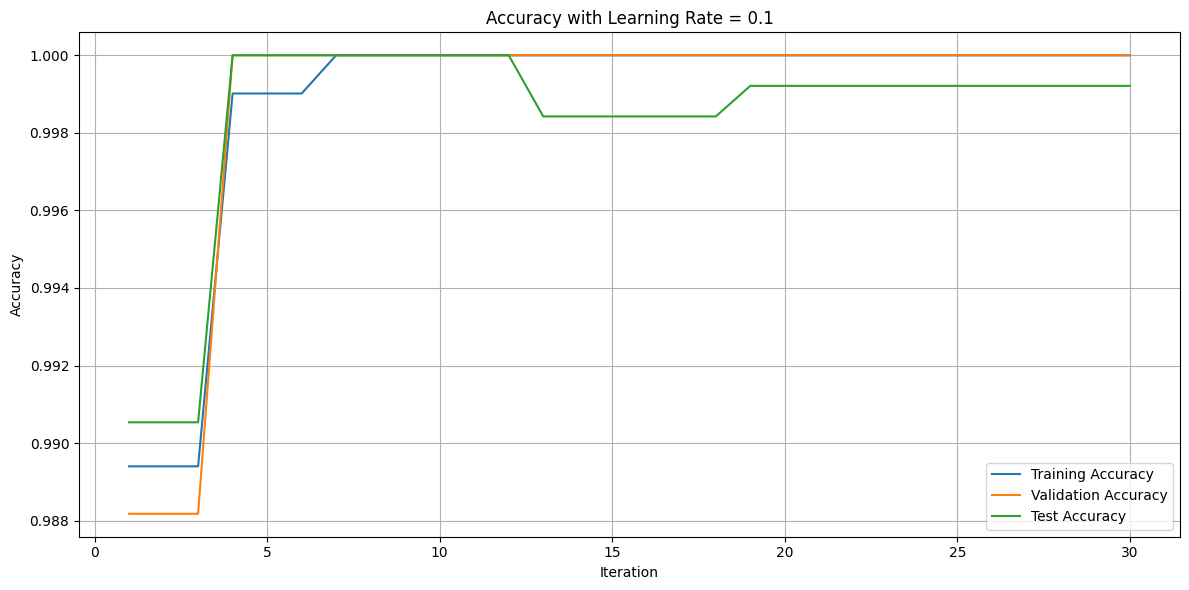

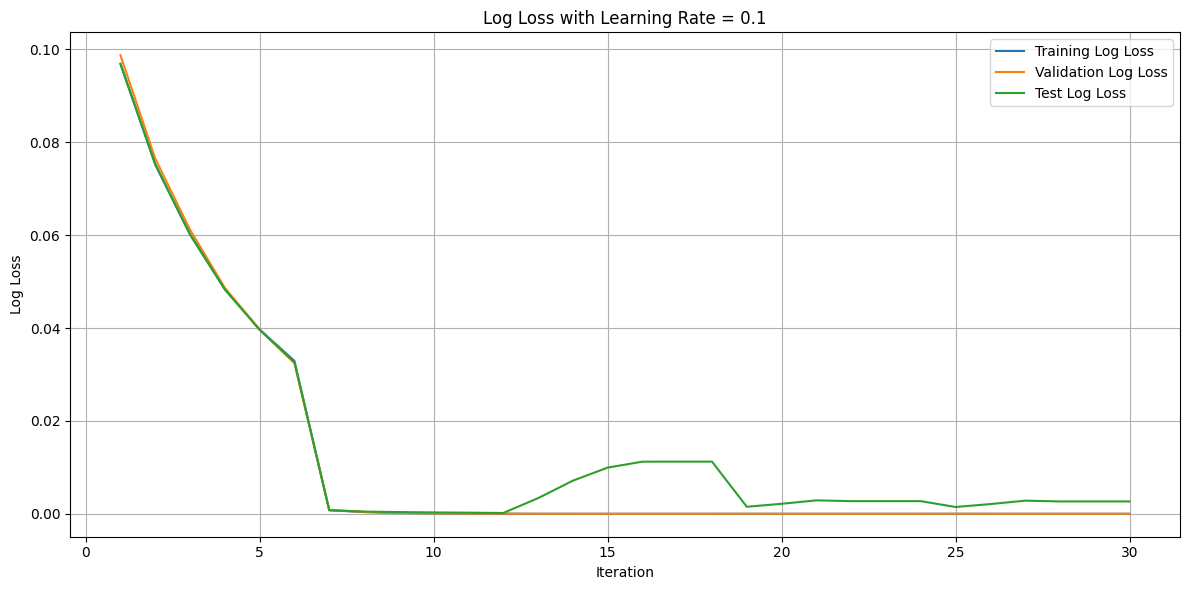

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from itertools import product

# Parameters for Grid Search
parameters = {
    "learning_rate": [0.1],
    "n_estimators": [125, 150, 175, 200, 225, 250],
    "max_depth": [1, 3, 5, 7, 9]
}

# Lists to store parameter combinations, iteration numbers, accuracies, and log losses
param_combinations = list(product(parameters["learning_rate"], parameters["max_depth"], parameters["n_estimators"]))
iterations = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

# Iterate over all parameter combinations
for iteration, (lr, max_depth, n_estimators) in enumerate(param_combinations, start=1):
    # Create classifier with current parameters
    gbc2 = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # Fit classifier to training data
    gbc2.fit(x_train, y_train)

    # Make predictions on training, validation, and test data
    y_train_pred = gbc2.predict(x_train)
    y_val_pred = gbc2.predict(x_val)
    y_test_pred = gbc2.predict(x_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log losses
    y_train_pred_proba = gbc2.predict_proba(x_train)
    y_val_pred_proba = gbc2.predict_proba(x_val)
    y_test_pred_proba = gbc2.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Append iteration number, accuracies, and log losses to lists
    iterations.append(iteration)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    print(f"Iteration {iteration}: learning_rate={lr}, max_depth={max_depth}, n_estimators={n_estimators}")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Validation Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print(f"  Training Log Loss: {train_loss:.4f}, Validation Log Loss: {val_loss:.4f}, Test Log Loss: {test_loss:.4f}")
    print()

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Learning Rate = 0.1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the log losses
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_losses, label='Training Log Loss')
plt.plot(iterations, val_losses, label='Validation Log Loss')
plt.plot(iterations, test_losses, label='Test Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss with Learning Rate = 0.1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Learning Rate = 0.05

Iteration 1: learning_rate=0.05, max_depth=1, n_estimators=125
  Training Accuracy: 0.9748582696573823
  Validation Accuracy: 0.9724137931034482
  Test Accuracy: 0.9771293375394322
  Training Log Loss: 0.2053, Validation Log Loss: 0.2090, Test Log Loss: 0.2056

Iteration 2: learning_rate=0.05, max_depth=1, n_estimators=150
  Training Accuracy: 0.9876756223810698
  Validation Accuracy: 0.987192118226601
  Test Accuracy: 0.9858044164037855
  Training Log Loss: 0.1741, Validation Log Loss: 0.1774, Test Log Loss: 0.1744

Iteration 3: learning_rate=0.05, max_depth=1, n_estimators=175
  Training Accuracy: 0.9876756223810698
  Validation Accuracy: 0.987192118226601
  Test Accuracy: 0.9858044164037855
  Training Log Loss: 0.1493, Validation Log Loss: 0.1521, Test Log Loss: 0.1494

Iteration 4: learning_rate=0.05, max_depth=1, n_estimators=200
  Training Accuracy: 0.9876756223810698
  Validation Accuracy: 0.987192118226601
  Test Accuracy: 0.9858044164037855
  Training Log Loss: 0.1291, Validat

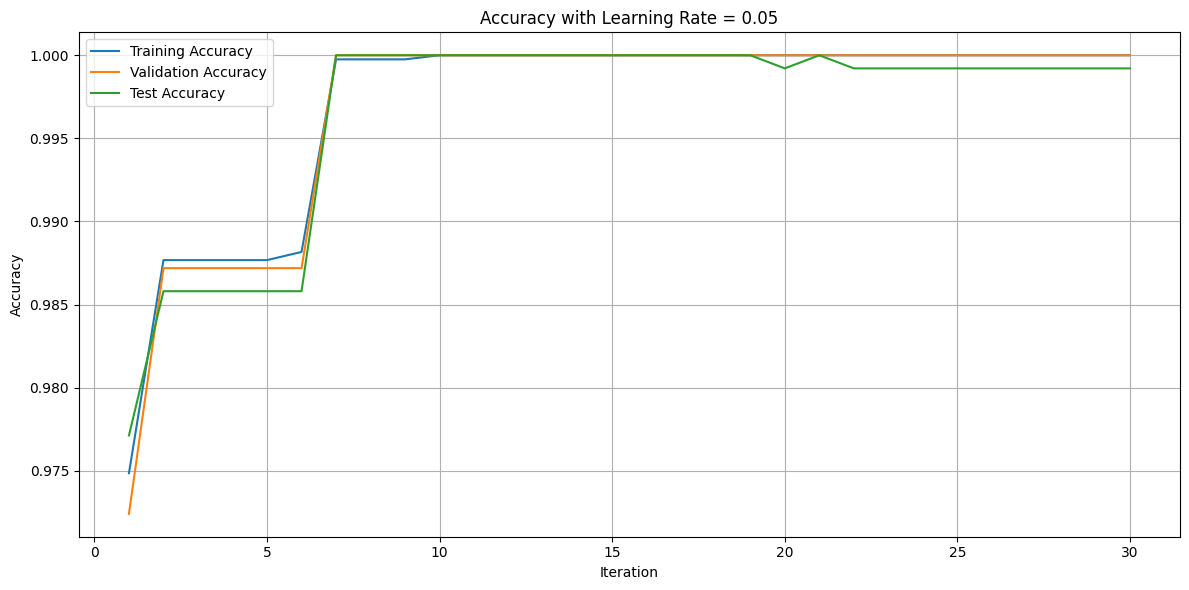

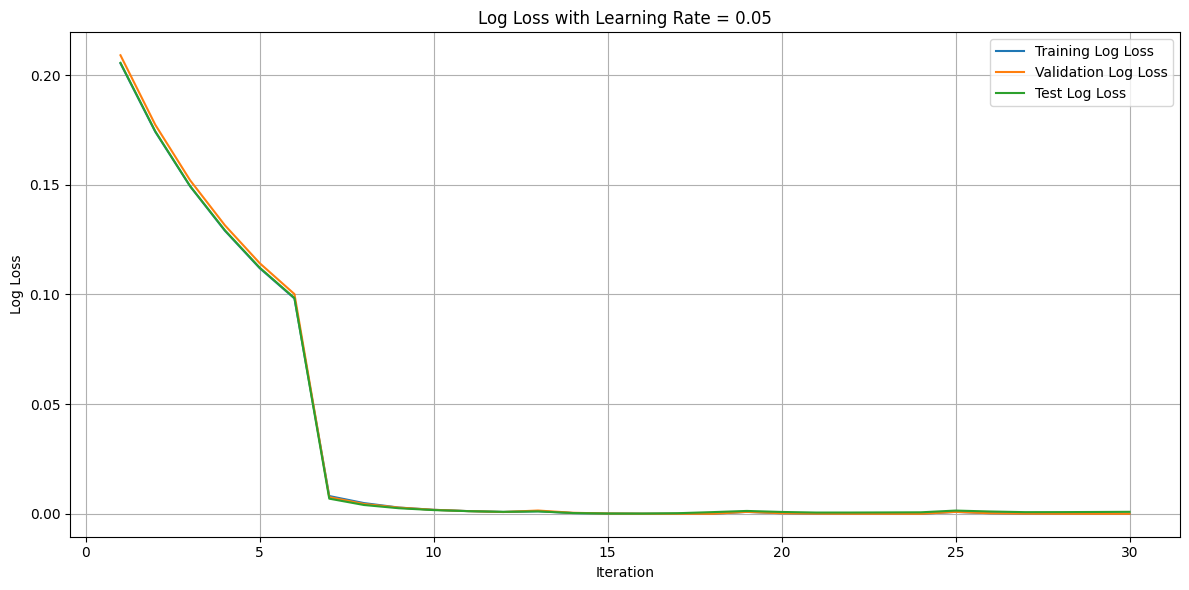

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from itertools import product

# Parameters for Grid Search
parameters = {
    "learning_rate": [0.05],
    "n_estimators": [125, 150, 175, 200, 225, 250],
    "max_depth": [1, 3, 5, 7, 9]
}

# Lists to store parameter combinations, iteration numbers, accuracies, and log losses
param_combinations = list(product(parameters["learning_rate"], parameters["max_depth"], parameters["n_estimators"]))
iterations = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

# Iterate over all parameter combinations
for iteration, (lr, max_depth, n_estimators) in enumerate(param_combinations, start=1):
    # Create classifier with current parameters
    gbc3 = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # Fit classifier to training data
    gbc3.fit(x_train, y_train)

    # Make predictions on training, validation, and test data
    y_train_pred = gbc3.predict(x_train)
    y_val_pred = gbc3.predict(x_val)
    y_test_pred = gbc3.predict(x_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log losses
    y_train_pred_proba = gbc3.predict_proba(x_train)
    y_val_pred_proba = gbc3.predict_proba(x_val)
    y_test_pred_proba = gbc3.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Append iteration number, accuracies, and log losses to lists
    iterations.append(iteration)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    print(f"Iteration {iteration}: learning_rate={lr}, max_depth={max_depth}, n_estimators={n_estimators}")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Validation Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print(f"  Training Log Loss: {train_loss:.4f}, Validation Log Loss: {val_loss:.4f}, Test Log Loss: {test_loss:.4f}")
    print()

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Learning Rate = 0.05')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the log losses
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_losses, label='Training Log Loss')
plt.plot(iterations, val_losses, label='Validation Log Loss')
plt.plot(iterations, test_losses, label='Test Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss with Learning Rate = 0.05')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Learning Rate = 0.01

Iteration 1: learning_rate=0.01, max_depth=1, n_estimators=125
  Training Accuracy: 0.8400295785062855
  Validation Accuracy: 0.8364532019704434
  Test Accuracy: 0.8351735015772871
  Training Log Loss: 0.4714, Validation Log Loss: 0.4782, Test Log Loss: 0.4735

Iteration 2: learning_rate=0.01, max_depth=1, n_estimators=150
  Training Accuracy: 0.8617204831156027
  Validation Accuracy: 0.8571428571428571
  Test Accuracy: 0.8596214511041009
  Training Log Loss: 0.4484, Validation Log Loss: 0.4554, Test Log Loss: 0.4501

Iteration 3: learning_rate=0.01, max_depth=1, n_estimators=175
  Training Accuracy: 0.8617204831156027
  Validation Accuracy: 0.8571428571428571
  Test Accuracy: 0.8596214511041009
  Training Log Loss: 0.4272, Validation Log Loss: 0.4342, Test Log Loss: 0.4287

Iteration 4: learning_rate=0.01, max_depth=1, n_estimators=200
  Training Accuracy: 0.8617204831156027
  Validation Accuracy: 0.8571428571428571
  Test Accuracy: 0.8596214511041009
  Training Log Loss: 0.4075, Vali

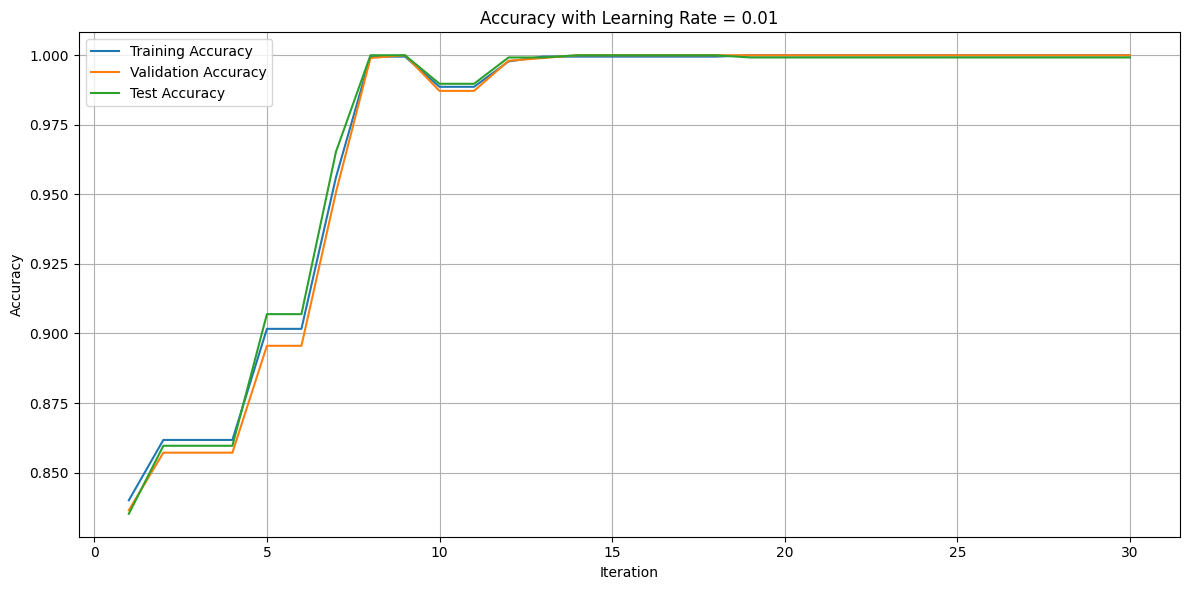

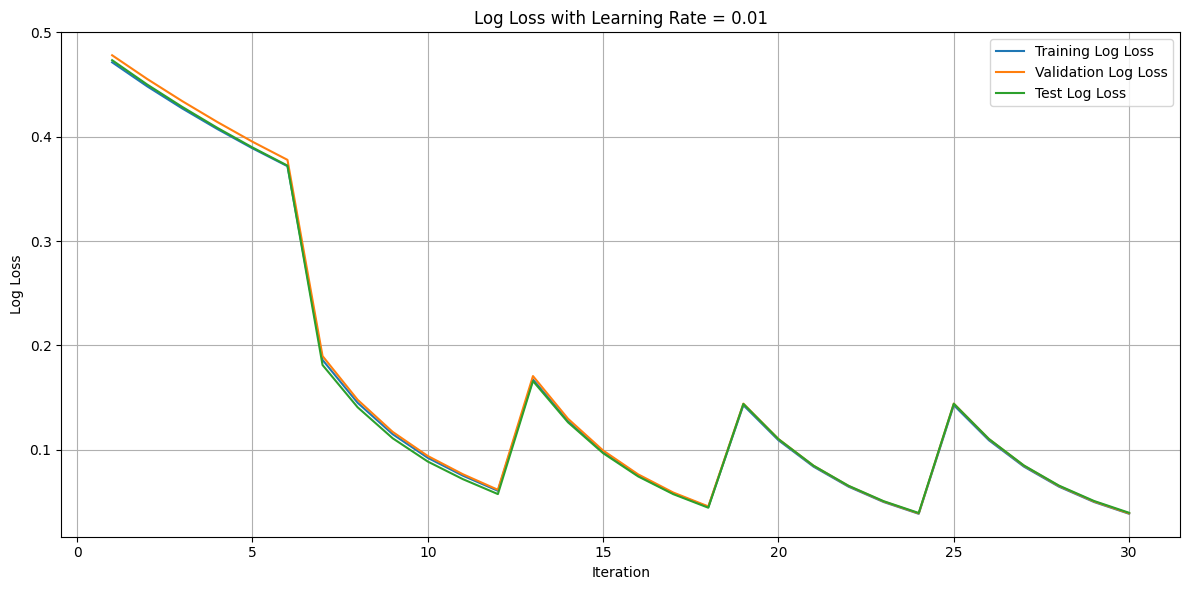

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from itertools import product

# Parameters for Grid Search
parameters = {
    "learning_rate": [0.01],
    "n_estimators": [125, 150, 175, 200, 225, 250],
    "max_depth": [1, 3, 5, 7, 9]
}

# Lists to store parameter combinations, iteration numbers, accuracies, and log losses
param_combinations = list(product(parameters["learning_rate"], parameters["max_depth"], parameters["n_estimators"]))
iterations = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

# Iterate over all parameter combinations
for iteration, (lr, max_depth, n_estimators) in enumerate(param_combinations, start=1):
    # Create classifier with current parameters
    gbc4 = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # Fit classifier to training data
    gbc4.fit(x_train, y_train)

    # Make predictions on training, validation, and test data
    y_train_pred = gbc4.predict(x_train)
    y_val_pred = gbc4.predict(x_val)
    y_test_pred = gbc4.predict(x_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

 # Calculate log losses
    y_train_pred_proba = gbc4.predict_proba(x_train)
    y_val_pred_proba = gbc4.predict_proba(x_val)
    y_test_pred_proba = gbc4.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Append iteration number, accuracies, and log losses to lists
    iterations.append(iteration)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    print(f"Iteration {iteration}: learning_rate={lr}, max_depth={max_depth}, n_estimators={n_estimators}")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Validation Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print(f"  Training Log Loss: {train_loss:.4f}, Validation Log Loss: {val_loss:.4f}, Test Log Loss: {test_loss:.4f}")
    print()

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Learning Rate = 0.01')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the log losses
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_losses, label='Training Log Loss')
plt.plot(iterations, val_losses, label='Validation Log Loss')
plt.plot(iterations, test_losses, label='Test Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss with Learning Rate = 0.01')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Learning rate = 0.005

Iteration 1: learning_rate=0.005, max_depth=1, n_estimators=125
  Training Accuracy: 0.839043628296771
  Validation Accuracy: 0.8354679802955665
  Test Accuracy: 0.8343848580441641
  Training Log Loss: 0.5408, Validation Log Loss: 0.5480, Test Log Loss: 0.5447

Iteration 2: learning_rate=0.005, max_depth=1, n_estimators=150
  Training Accuracy: 0.839043628296771
  Validation Accuracy: 0.8354679802955665
  Test Accuracy: 0.8343848580441641
  Training Log Loss: 0.5250, Validation Log Loss: 0.5319, Test Log Loss: 0.5282

Iteration 3: learning_rate=0.005, max_depth=1, n_estimators=175
  Training Accuracy: 0.839043628296771
  Validation Accuracy: 0.8354679802955665
  Test Accuracy: 0.8343848580441641
  Training Log Loss: 0.5105, Validation Log Loss: 0.5172, Test Log Loss: 0.5131

Iteration 4: learning_rate=0.005, max_depth=1, n_estimators=200
  Training Accuracy: 0.8400295785062855
  Validation Accuracy: 0.8364532019704434
  Test Accuracy: 0.8351735015772871
  Training Log Loss: 0.4970, Val

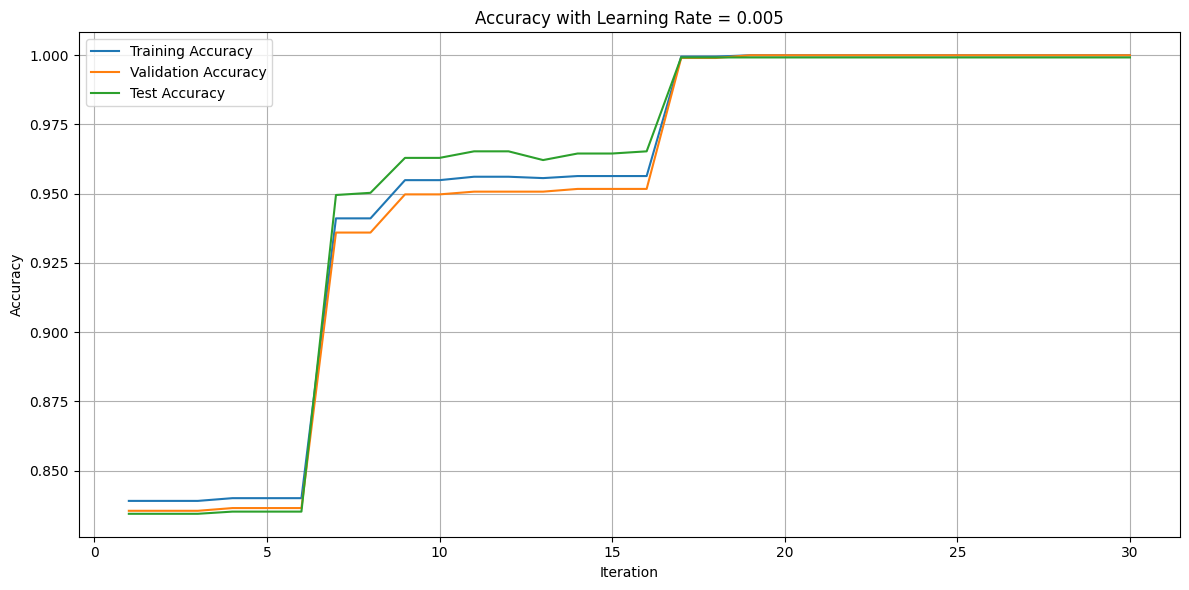

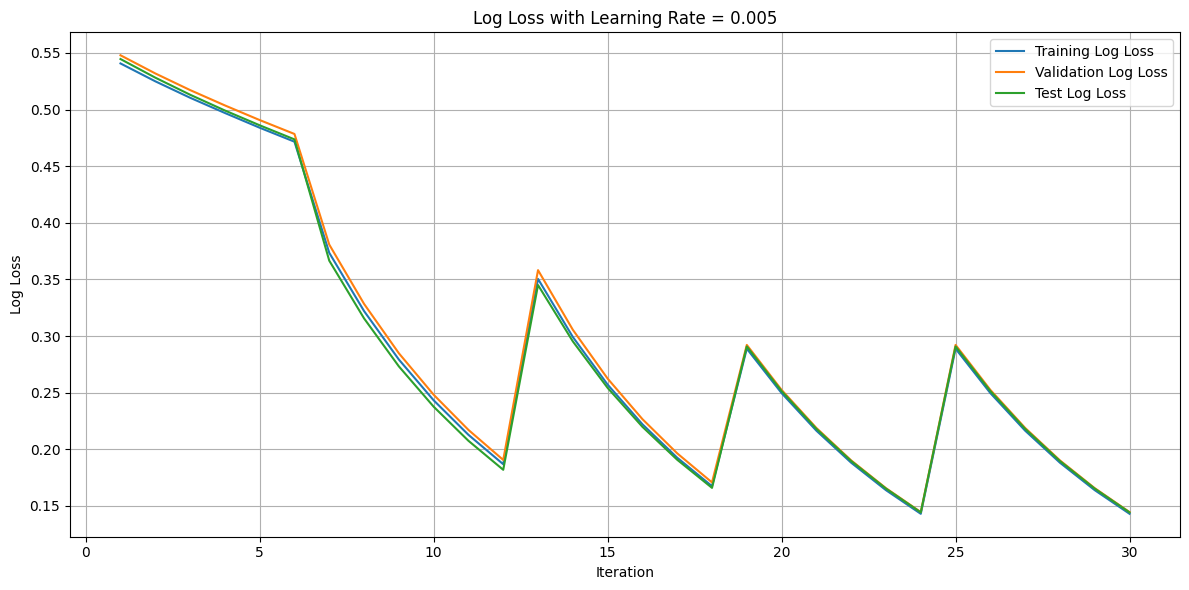

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from itertools import product

# Parameters for Grid Search
parameters = {
    "learning_rate": [0.005],
    "n_estimators": [125, 150, 175, 200, 225, 250],
    "max_depth": [1, 3, 5, 7, 9]
}

# Lists to store parameter combinations, iteration numbers, accuracies, and log losses
param_combinations = list(product(parameters["learning_rate"], parameters["max_depth"], parameters["n_estimators"]))
iterations = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

# Iterate over all parameter combinations
for iteration, (lr, max_depth, n_estimators) in enumerate(param_combinations, start=1):
    # Create classifier with current parameters
    gbc5 = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # Fit classifier to training data
    gbc5.fit(x_train, y_train)

    # Make predictions on training, validation, and test data
    y_train_pred = gbc5.predict(x_train)
    y_val_pred = gbc5.predict(x_val)
    y_test_pred = gbc5.predict(x_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log losses
    y_train_pred_proba = gbc5.predict_proba(x_train)
    y_val_pred_proba = gbc5.predict_proba(x_val)
    y_test_pred_proba = gbc5.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Append iteration number, accuracies, and log losses to lists
    iterations.append(iteration)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    print(f"Iteration {iteration}: learning_rate={lr}, max_depth={max_depth}, n_estimators={n_estimators}")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Validation Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print(f"  Training Log Loss: {train_loss:.4f}, Validation Log Loss: {val_loss:.4f}, Test Log Loss: {test_loss:.4f}")
    print()

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Learning Rate = 0.005')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the log losses
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_losses, label='Training Log Loss')
plt.plot(iterations, val_losses, label='Validation Log Loss')
plt.plot(iterations, test_losses, label='Test Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss with Learning Rate = 0.005')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



##Learning Rate = 0.001

Iteration 1: learning_rate=0.001, max_depth=1, n_estimators=125
  Training Accuracy: 0.6364308602415578
  Validation Accuracy: 0.6197044334975369
  Test Accuracy: 0.6285488958990536
  Training Log Loss: 0.6245, Validation Log Loss: 0.6321, Test Log Loss: 0.6291

Iteration 2: learning_rate=0.001, max_depth=1, n_estimators=150
  Training Accuracy: 0.6364308602415578
  Validation Accuracy: 0.6197044334975369
  Test Accuracy: 0.6285488958990536
  Training Log Loss: 0.6192, Validation Log Loss: 0.6267, Test Log Loss: 0.6238

Iteration 3: learning_rate=0.001, max_depth=1, n_estimators=175
  Training Accuracy: 0.6364308602415578
  Validation Accuracy: 0.6197044334975369
  Test Accuracy: 0.6285488958990536
  Training Log Loss: 0.6140, Validation Log Loss: 0.6215, Test Log Loss: 0.6186

Iteration 4: learning_rate=0.001, max_depth=1, n_estimators=200
  Training Accuracy: 0.6364308602415578
  Validation Accuracy: 0.6197044334975369
  Test Accuracy: 0.6285488958990536
  Training Log Loss: 0.6090, 

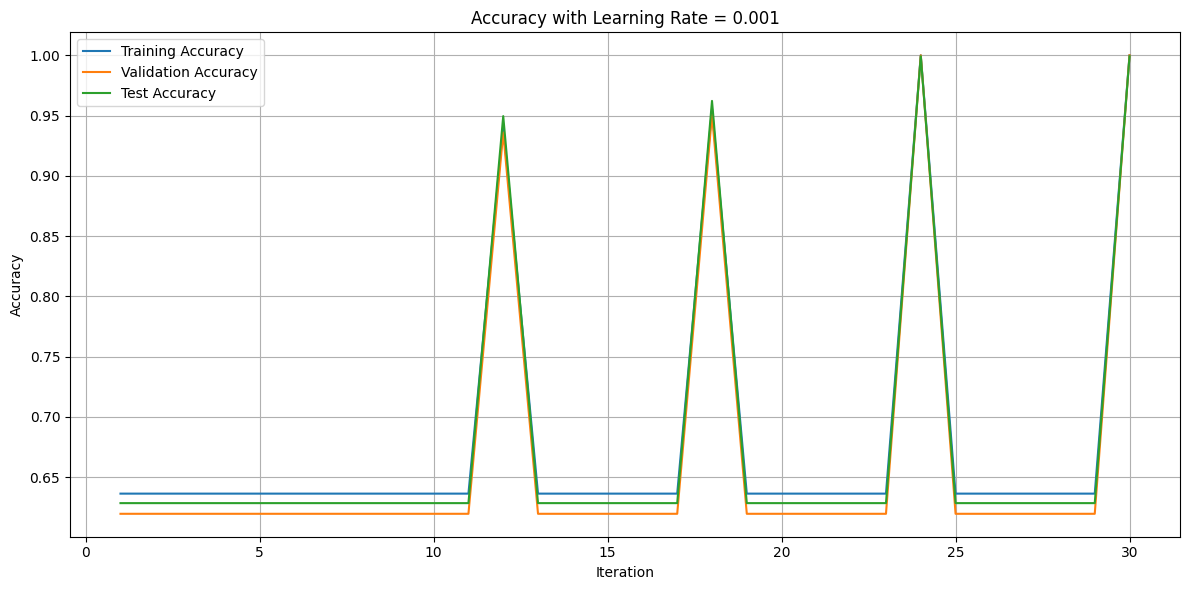

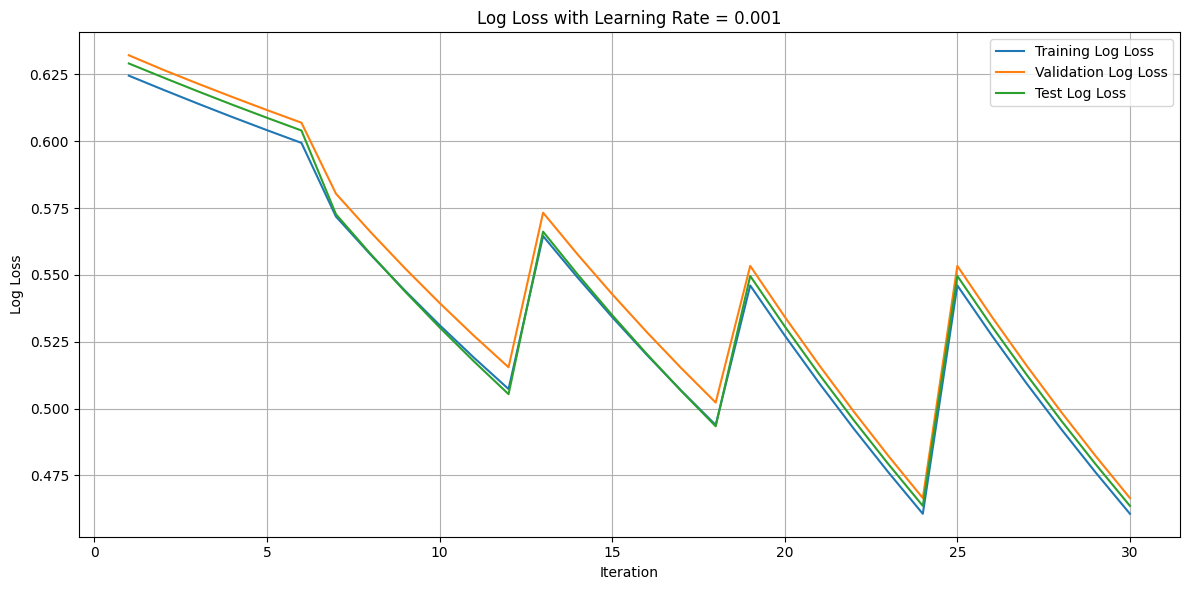

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from itertools import product

# Parameters for Grid Search
parameters = {
    "learning_rate": [0.001],
    "n_estimators": [125, 150, 175, 200, 225, 250],
    "max_depth": [1, 3, 5, 7, 9]
}

# Lists to store parameter combinations, iteration numbers, accuracies, and log losses
param_combinations = list(product(parameters["learning_rate"], parameters["max_depth"], parameters["n_estimators"]))
iterations = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

# Iterate over all parameter combinations
for iteration, (lr, max_depth, n_estimators) in enumerate(param_combinations, start=1):
    # Create classifier with current parameters
    gbc6 = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # Fit classifier to training data
    gbc6.fit(x_train, y_train)

    # Make predictions on training, validation, and test data
    y_train_pred = gbc6.predict(x_train)
    y_val_pred = gbc6.predict(x_val)
    y_test_pred = gbc6.predict(x_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log losses
    y_train_pred_proba = gbc6.predict_proba(x_train)
    y_val_pred_proba = gbc6.predict_proba(x_val)
    y_test_pred_proba = gbc6.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_pred_proba)
    val_loss = log_loss(y_val, y_val_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Append iteration number, accuracies, and log losses to lists
    iterations.append(iteration)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    print(f"Iteration {iteration}: learning_rate={lr}, max_depth={max_depth}, n_estimators={n_estimators}")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Validation Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print(f"  Training Log Loss: {train_loss:.4f}, Validation Log Loss: {val_loss:.4f}, Test Log Loss: {test_loss:.4f}")
    print()

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy with Learning Rate = 0.001')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the log losses
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_losses, label='Training Log Loss')
plt.plot(iterations, val_losses, label='Validation Log Loss')
plt.plot(iterations, test_losses, label='Test Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss with Learning Rate = 0.001')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#**Classify with Hyperparameter (using *GridSearchCV*)**

In [ ]:
parameters = {
    "learning_rate": [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
    "n_estimators":[125, 150, 175, 200, 225, 250],
    "max_depth":[1,3,5,7,9]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(GradientBoostingClassifier(random_state=4), parameters,n_jobs=-1)

model.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=4), n_jobs=-1,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [125, 150, 175, 200, 225, 250]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model.best_estimator_)
print("\n The best score across ALL searched params:\n",model.best_score_)
print("\n The best parameters across ALL searched params:\n",model.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.15, max_depth=1, n_estimators=150,
                           random_state=4)

 The best score across ALL searched params:
 0.9985206489585927

 The best parameters across ALL searched params:
 {'learning_rate': 0.15, 'max_depth': 1, 'n_estimators': 150}


In [ ]:
#Importing library
from sklearn.ensemble import GradientBoostingClassifier
#Calling library
model1 = GradientBoostingClassifier(learning_rate=0.15, max_depth=1, n_estimators=150)
#Training model on the current data train
model1.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=1, n_estimators=150)

In [ ]:
import pickle

# Save the model to a file
with open('gb_gridsearchCV.pkl', 'wb') as file:
    pickle.dump(model1, file)

Training Accuracy: 0.9990140497904856
Validation Accuracy: 1.0
Test Accuracy: 1.0


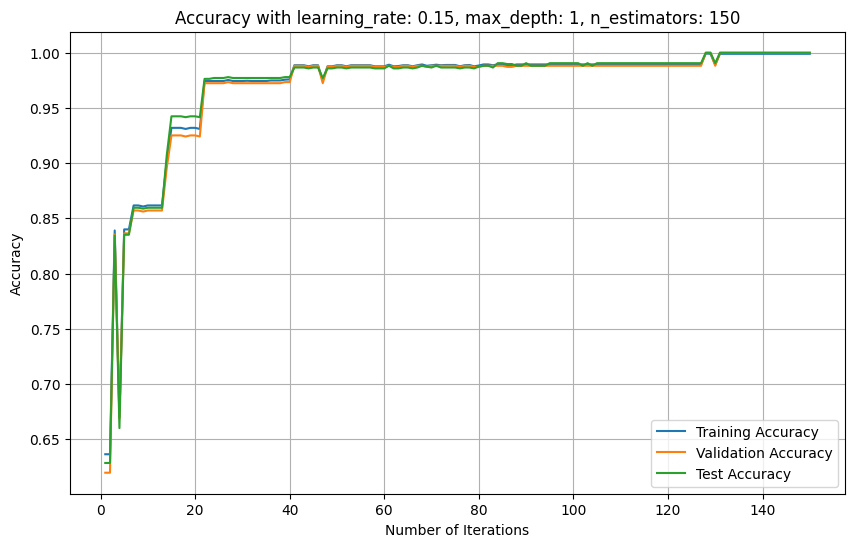

In [ ]:
import pickle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_val, y_val, x_test, y_test are already defined

# Load the pre-trained GradientBoostingClassifier model
with open('gb_gridsearchCV.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

train_accuracies = []
val_accuracies = []
test_accuracies = []

# Obtain staged predictions and collect accuracies
for train_pred, val_pred, test_pred in zip(
    loaded_model.staged_predict(x_train),
    loaded_model.staged_predict(x_val),
    loaded_model.staged_predict(x_test)
):
    # Training accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Validation accuracy
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)

    # Test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')
print(f"Test Accuracy: {test_accuracy}")
# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy with learning_rate: 0.15, max_depth: 1, n_estimators: 150')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, test_pred)}\n")

Confusion Matrix :- 
[[471   0]
 [  0 797]]



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, test_pred, average='binary')
recall = recall_score(y_test, test_pred, average='binary')
f1 = f1_score(y_test, test_pred, average='binary')

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Precision: 1.0, Recall: 1.0, F1 Score: 1.0


AUC: 1.0


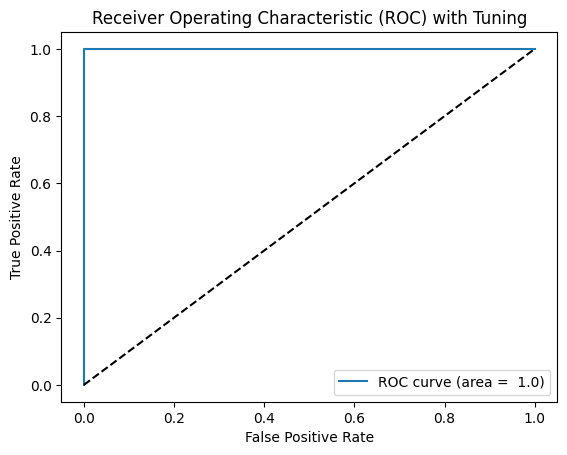

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score

fpr2, tpr2, thresholds = roc_curve(y_test, test_pred)
auc2 = auc(fpr2, tpr2)
print(f"AUC: {auc2}")

plt.plot(fpr2, tpr2,label=f'ROC curve (area =  {auc2})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal untuk klasifikasi acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with Tuning')
plt.legend(loc='lower right')
plt.show()


#**Input Data**

##Data 1

###Prepare data

In [ ]:
df1= pd.read_csv('DataBalance .csv', header=0)
df1.head(10)

,Unnamed: 0,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,0,4.74,48,37,67,Tidak
1,1,4.74,48,37,67,Tidak
2,2,4.71,48,38,65,Tidak
3,3,4.71,48,38,65,Tidak
4,4,4.69,48,38,65,Tidak
5,5,4.69,48,38,65,Tidak
6,6,4.66,48,38,64,Tidak
7,7,4.67,48,38,64,Tidak
8,8,4.66,47,38,64,Tidak
9,9,4.66,47,38,64,Tidak


In [ ]:
#Drop Columns
df1.drop(df1.columns[[0]], axis=1, inplace=True)
#df.to_csv('DataBersih.csv')
df1

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,4.74,48,37,67,Tidak
1,4.74,48,37,67,Tidak
2,4.71,48,38,65,Tidak
3,4.71,48,38,65,Tidak
4,4.69,48,38,65,Tidak
...,...,...,...,...,...
4659,5.16,19,36,41,Ya
4660,4.46,67,37,46,Ya
4661,4.17,16,30,41,Ya
4662,4.45,67,37,47,Ya


In [ ]:
df1.isna().sum()

pHTanah            0
KelembabanTanah    0
SuhuUdara          0
KelembabanUdara    0
Label              0
dtype: int64

In [ ]:
df1 = df1.dropna()
df1.isnull().sum()

pHTanah            0
KelembabanTanah    0
SuhuUdara          0
KelembabanUdara    0
Label              0
dtype: int64

In [ ]:
df1

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,4.74,48,37,67,Tidak
1,4.74,48,37,67,Tidak
2,4.71,48,38,65,Tidak
3,4.71,48,38,65,Tidak
4,4.69,48,38,65,Tidak
...,...,...,...,...,...
4659,5.16,19,36,41,Ya
4660,4.46,67,37,46,Ya
4661,4.17,16,30,41,Ya
4662,4.45,67,37,47,Ya


In [ ]:
#Transforming Label into 0 1 (numerical) format
df1['Label'] = df1['Label'].map({'Tidak': 0, 'Ya': 1})
df1['Label'] = pd.to_numeric(df1['Label'], errors='coerce')

In [ ]:
#Checking Label's current datatype
cols = ['Label']

for col in cols:
    print(f"{col} has {df1[col].unique()} values\n")

Label has [0 1] values



In [ ]:
#Separating X dataframe
x=df1.iloc[:,0:-1]
x

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
0,4.74,48,37,67
1,4.74,48,37,67
2,4.71,48,38,65
3,4.71,48,38,65
4,4.69,48,38,65
...,...,...,...,...
4659,5.16,19,36,41
4660,4.46,67,37,46
4661,4.17,16,30,41
4662,4.45,67,37,47


In [ ]:
#Separating Y dataframe
y=df1.iloc[:,[-1]]
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
4659,1
4660,1
4661,1
4662,1


###Evaluate data

In [ ]:
with open('gb_default.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
predictions = loaded_model.predict(x)

In [ ]:
test_accuracy = accuracy_score(y, predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


In [ ]:
with open('gb_gridsearchCV.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
predictions = loaded_model.predict(x)

In [ ]:
test_accuracy = accuracy_score(y, predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9991423670668954


##Data 2

###Prepare data

In [ ]:
df2= pd.read_csv('databaru.csv', delimiter=';',header=0)
df2.head(10)

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,3.92,64,NaN,NaN,Tidak
1,3.89,64,NaN,NaN,Tidak
2,3.88,64,41.0,39.0,Tidak
3,3.87,64,41.0,38.0,Tidak
4,3.87,64,41.0,38.0,Tidak
5,3.85,64,42.0,38.0,Tidak
6,3.85,64,42.0,38.0,Tidak
7,4.82,64,42.0,37.0,Tidak
8,4.66,63,42.0,38.0,Tidak
9,4.60,63,42.0,38.0,Tidak


In [ ]:
df2.isna().sum()

pHTanah            0
KelembabanTanah    0
SuhuUdara          6
KelembabanUdara    6
Label              0
dtype: int64

In [ ]:
df2 = df2.dropna()
df2.isnull().sum()

pHTanah            0
KelembabanTanah    0
SuhuUdara          0
KelembabanUdara    0
Label              0
dtype: int64

In [ ]:
df2

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
2,3.88,64,41.0,39.0,Tidak
3,3.87,64,41.0,38.0,Tidak
4,3.87,64,41.0,38.0,Tidak
5,3.85,64,42.0,38.0,Tidak
6,3.85,64,42.0,38.0,Tidak
...,...,...,...,...,...
1990,7.10,70,44.0,35.0,Ya
1991,7.12,70,44.0,35.0,Ya
1992,7.10,70,44.0,35.0,Ya
1993,7.12,70,44.0,34.0,Ya


In [ ]:
#Transforming Label into 0 1 (numerical) format
df2['Label'] = df2['Label'].map({'Tidak': 0, 'Ya': 1})
df2['Label'] = pd.to_numeric(df2['Label'], errors='coerce')

In [ ]:
#Checking Label's current datatype
cols = ['Label']

for col in cols:
    print(f"{col} has {df2[col].unique()} values\n")

Label has [0 1] values



In [ ]:
#Separating X dataframe
x=df2.iloc[:,0:-1]
x

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
2,3.88,64,41.0,39.0
3,3.87,64,41.0,38.0
4,3.87,64,41.0,38.0
5,3.85,64,42.0,38.0
6,3.85,64,42.0,38.0
...,...,...,...,...
1990,7.10,70,44.0,35.0
1991,7.12,70,44.0,35.0
1992,7.10,70,44.0,35.0
1993,7.12,70,44.0,34.0


In [ ]:
#Separating Y dataframe
y=df2.iloc[:,[-1]]
y

,Label
2,0
3,0
4,0
5,0
6,0
...,...
1990,1
1991,1
1992,1
1993,1


###Evaluate data

In [ ]:
with open('gb_default.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
predictions = loaded_model.predict(x)

In [ ]:
test_accuracy = accuracy_score(y, predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7521367521367521


In [ ]:
with open('gb_gridsearchCV.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
predictions = loaded_model.predict(x)

In [ ]:
test_accuracy = accuracy_score(y, predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9205630970336852


##Data 3

###Prepare data

In [ ]:
df3= pd.read_csv('Day1Titik1.csv', delimiter=';',header=0)
df3.head(10)

,ADC pH Tanah,pHTanah,ADC Kelembaban Tanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label,pHTanah1
0,219,4.7410,527,48,37,67,Tidak,"4,74"
1,219,4.7410,528,48,37,67,Tidak,"4,74"
2,221,4.7132,531,48,38,65,Tidak,"4,71"
3,221,4.7132,532,48,38,65,Tidak,"4,71"
4,223,4.6854,533,48,38,65,Tidak,"4,69"
5,223,4.6854,534,48,38,65,Tidak,"4,69"
6,225,4.6576,536,48,38,64,Tidak,"4,66"
7,224,4.6715,537,48,38,64,Tidak,"4,67"
8,225,4.6576,539,47,38,64,Tidak,"4,66"
9,225,4.6576,540,47,38,64,Tidak,"4,66"


In [ ]:
#Drop Columns
df3.drop(df3.columns[[0,2,7]], axis=1, inplace=True)
#df.to_csv('DataBersih.csv')
df3

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,4.7410,48,37,67,Tidak
1,4.7410,48,37,67,Tidak
2,4.7132,48,38,65,Tidak
3,4.7132,48,38,65,Tidak
4,4.6854,48,38,65,Tidak
...,...,...,...,...,...
144,4.4630,41,43,48,Tidak
145,4.4630,41,43,48,Tidak
146,4.4491,41,43,48,Tidak
147,4.4630,41,43,48,Tidak


In [ ]:
df3.isna().sum()

pHTanah            0
KelembabanTanah    0
SuhuUdara          0
KelembabanUdara    0
Label              0
dtype: int64

In [ ]:
df3 = df3.dropna()
df3.isnull().sum()

pHTanah            0
KelembabanTanah    0
SuhuUdara          0
KelembabanUdara    0
Label              0
dtype: int64

In [ ]:
df3

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara,Label
0,4.7410,48,37,67,Tidak
1,4.7410,48,37,67,Tidak
2,4.7132,48,38,65,Tidak
3,4.7132,48,38,65,Tidak
4,4.6854,48,38,65,Tidak
...,...,...,...,...,...
144,4.4630,41,43,48,Tidak
145,4.4630,41,43,48,Tidak
146,4.4491,41,43,48,Tidak
147,4.4630,41,43,48,Tidak


In [ ]:
#Transforming Label into 0 1 (numerical) format
df3['Label'] = df3['Label'].map({'Tidak': 0, 'Ya': 1})
df3['Label'] = pd.to_numeric(df3['Label'], errors='coerce')

In [ ]:
#Checking Label's current datatype
cols = ['Label']

for col in cols:
    print(f"{col} has {df3[col].unique()} values\n")

Label has [0 1] values



In [ ]:
#Separating X dataframe
x=df3.iloc[:,0:-1]
x

,pHTanah,KelembabanTanah,SuhuUdara,KelembabanUdara
0,4.7410,48,37,67
1,4.7410,48,37,67
2,4.7132,48,38,65
3,4.7132,48,38,65
4,4.6854,48,38,65
...,...,...,...,...
144,4.4630,41,43,48
145,4.4630,41,43,48
146,4.4491,41,43,48
147,4.4630,41,43,48


In [ ]:
#Separating Y dataframe
y=df3.iloc[:,[-1]]
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
144,0
145,0
146,0
147,0


###Evaluate data

In [ ]:
with open('gb_default.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
predictions = loaded_model.predict(x)

In [ ]:
test_accuracy = accuracy_score(y, predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


In [ ]:
with open('gb_gridsearchCV.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
predictions = loaded_model.predict(x)

In [ ]:
test_accuracy = accuracy_score(y, predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0
